# Natural Language Processing Project

In this NLP project I attempted to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review receives. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

## The Data

In [4]:
yelp = pd.read_csv('yelp.csv')

In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# Exploratory Data Analysis

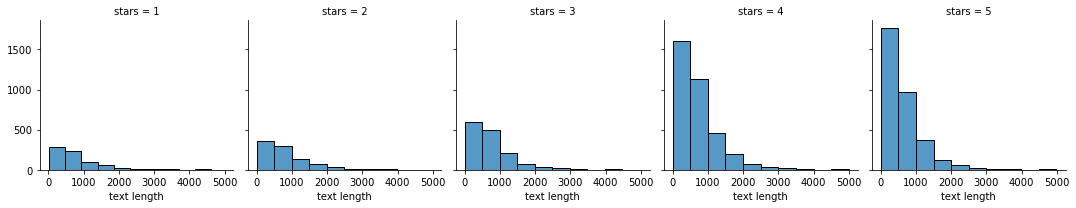

In [13]:
g = sns.FacetGrid(yelp, col="stars")
g.map(sns.histplot, "text length",bins=10)

<AxesSubplot:xlabel='stars', ylabel='text length'>

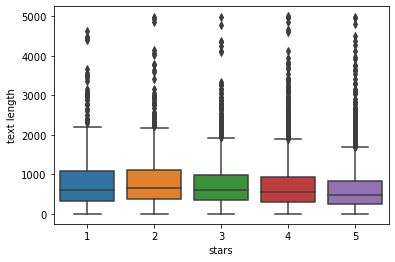

In [14]:
sns.boxplot(data=yelp,x='stars',y='text length')

<AxesSubplot:xlabel='stars', ylabel='count'>

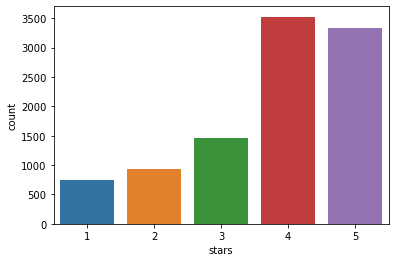

In [15]:
sns.countplot(data=yelp,x='stars')

In [17]:
yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [18]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

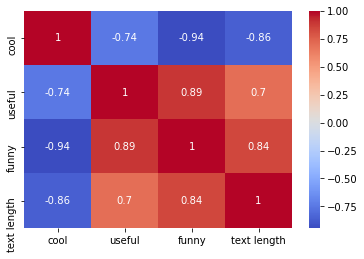

In [21]:
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

**Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [80]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [81]:
X = yelp_class['text']
X.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [82]:
y = yelp_class['stars']
y.head()

0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv = CountVectorizer()

In [85]:
X = cv.fit_transform(X)

## Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

**Import MultinomialNB**

In [94]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()

In [95]:
nb.fit(X_train,y_train)

#rf.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

In [96]:
predictions = nb.predict(X_test)

#predictions = rf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [93]:
#RF results
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 53 175]
 [  2 996]]
              precision    recall  f1-score   support

           1       0.96      0.23      0.37       228
           5       0.85      1.00      0.92       998

    accuracy                           0.86      1226
   macro avg       0.91      0.62      0.65      1226
weighted avg       0.87      0.86      0.82      1226



**Now include TF-IDF to this process using a pipeline.**

# Using Text Processing

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
from sklearn.pipeline import Pipeline

In [104]:
#from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('classifier',MultinomialNB())
])

#pipeline = Pipeline([
#    ('bow',CountVectorizer()),
#    ('tfidf',TfidfTransformer()),
#    ('classifier',MultinomialNB())
#])

### Train Test Split

In [105]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [106]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

### Predictions and Evaluation

In [107]:
predict = pipeline.predict(X_test)

In [108]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[155  73]
 [ 15 983]]
              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



In [103]:
#RF results
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[ 60 168]
 [  1 997]]
              precision    recall  f1-score   support

           1       0.98      0.26      0.42       228
           5       0.86      1.00      0.92       998

    accuracy                           0.86      1226
   macro avg       0.92      0.63      0.67      1226
weighted avg       0.88      0.86      0.83      1226



Looks like Tf-Idf actually made things worse!